In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

import id_gan

Using device cuda


[epoch 19] loss = 179.9329: 100%|██████████| 2360/2360 [01:59<00:00, 19.83it/s]


Saving VAE model to output/mnist_vae.pt


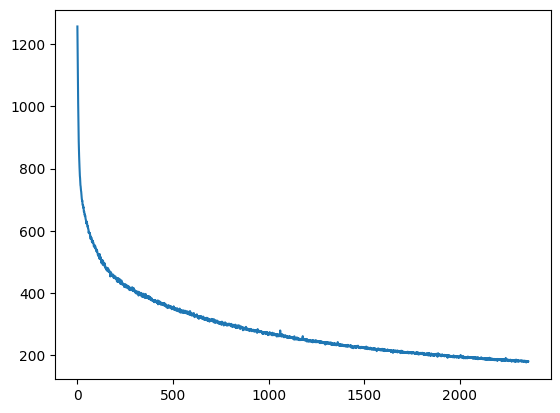

In [2]:
results = id_gan.train_vae("mnist", batch_size=512, num_workers=8, epochs=20)
plt.plot(results["loss"])

Loading VAE model from output/mnist_vae.pt


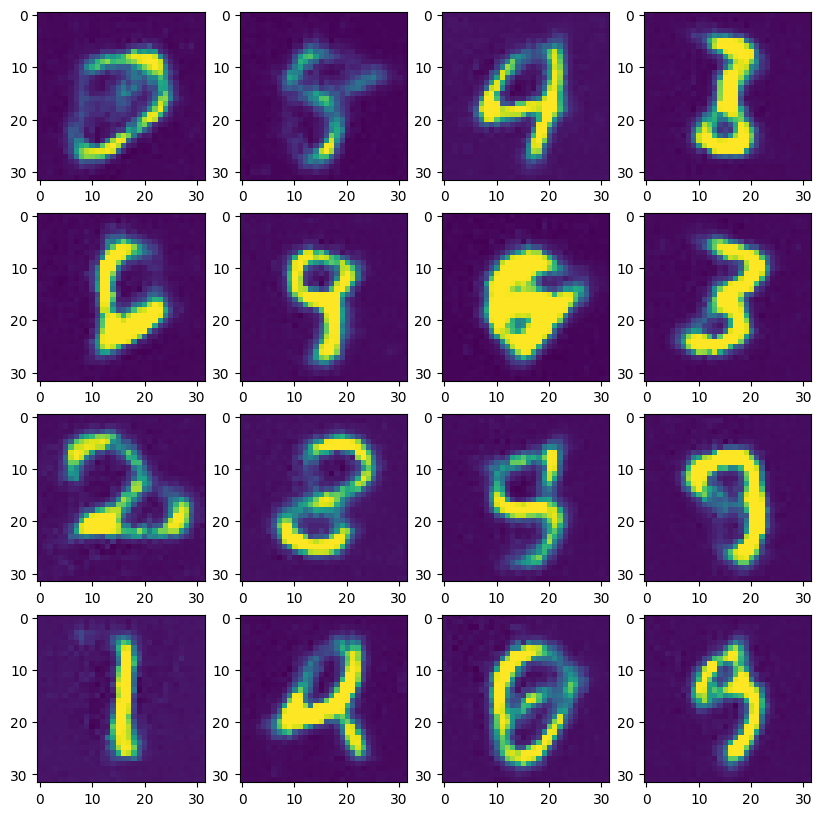

In [4]:
vae = id_gan.load_vae("mnist")

with torch.no_grad():
    images = vae.sample(16)

plt.figure(figsize=(10, 10))
for ind, image in enumerate(images):
    plt.subplot(4, 4, ind+1)
    plt.imshow(image[0].numpy())
plt.show()

Using device cuda
Loading VAE model from output/mnist_vae.pt


[epoch 59] G_loss = 1.9470, D_loss = 0.9222: 100%|██████████| 7080/7080 [06:51<00:00, 17.20it/s]


Saving GAN model to output/mnist_gan_g.pt, output/mnist_gan_d.pt


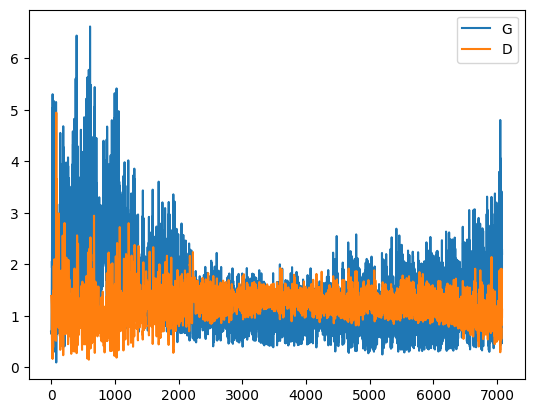

In [4]:
import id_gan
import matplotlib.pyplot as plt

results = id_gan.train_gan("mnist", epochs=60, num_workers=8, batch_size=512)

plt.plot(results["loss_g"], label="G")
plt.plot(results["loss_d"], label="D")
plt.legend()
plt.show()

Loading GAN model from output/mnist_gan_g.pt


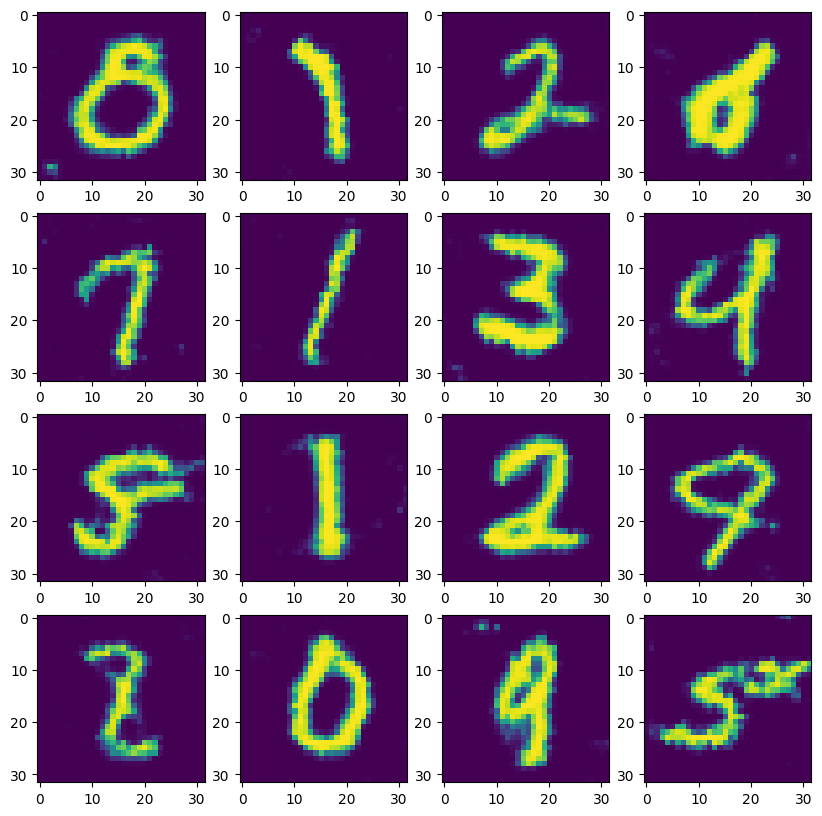

In [7]:
gan = id_gan.load_gan("mnist")

with torch.no_grad():
    z = torch.randn(16, 40)
    images = gan(z)


plt.figure(figsize=(10, 10))
for ind, image in enumerate(images):
    plt.subplot(4, 4, ind+1)
    plt.imshow(image[0].numpy())
plt.show()

## Conclusion

There are some artifacts visible in GAN, but on average the images are more clear than images from VAE. For VAE the images are quite blurred, which is expected from that model.

Overall the performance of GAN comes down to the correctly selected hyperparameters such as number of layers, learning rate, etc.